В цьому домашньому завданні кожне завдання оцінюється по 10 балів.

 **Завдання 1.** Після перегляду лекцій про поняття функії, вступ до лінійної алгебри і мат. формулювання лін. регресії знайдіть найкращу лінію для прогнозу `charges` за `age` **для некурців** (датафрейм `non_smoker_df`) з допомогою

1. Методу МНК (з використанням тільки `numpy`, без `scikit learn`)

2. Full-Batch градієнтного спуску з `numpy` . Протестуйте 3 різних learning rate і зробіть висновок, який є найкращим виходячи з практик для цього, наведених в лекції. Зверніть увагу, що на вхід треба набір даних дворозміний, для цього можливо треба буде трансформувати Ваші дані X в формат, як був в лекції "Математичне формулювання лінійної регресії". Також, градієнтний спуск в нашому випадку може розходитись з навчальним рейтом 0.1, бо цей рейт в цій задачі завеликий. Спробуйте нижчі рейти.
3. З `scikit-learn.LinearRegression`. Тут зверніть увагу, що вхід `X` має бути двовимірним масивом, тому нам потрібно передати dataframe, а не окрему колонку. Якщо у Вас X - колонка (а у Вас так мало б бути), то можна скористатись `X.to_frame()` щоб конвертувати колонку в датафрейм.

Для кожного методу
- знайдіть і виведіть коефіцієнти моделі
- обчисліть прогнози моделі і збережіть в окрему змінну
- порахуйте точність прогнозу RMSE  

Для градієнтного спуску виведіть графік помилки в залежності від ітерації.

А також побудуйте на одному графіку дані `age` проти `charges` в вигляді діаграми розсіювання і всі три лінії регресії, знайдені кожним з методів (для град. спуску оберіть варіант з тим learning rate, який виявився найкращим).

Зробіть висновки, чи відрізняються результати моделей?
Чи є знайдены параметри моделы близькими до ваших найкращих припущень?

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [59]:
import pandas as pd
medical_df = pd.read_csv("/content/drive/MyDrive/Machine_Learning/datasets/module_02/medical-charges.csv") # замініть на ваш шлях до файлу
non_smoker_df = medical_df[medical_df.smoker == 'no']

# МНК

In [60]:
import numpy as np

In [61]:
X = non_smoker_df["age"]
y = non_smoker_df["charges"]
def normal_equations(X,y):
    theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
    return theta

X_with_intercept = np.c_[np.ones((X.shape[0], 1)), X]
X[:3], X_with_intercept[:3]


(1    18
 2    28
 3    33
 Name: age, dtype: int64,
 array([[ 1., 18.],
        [ 1., 28.],
        [ 1., 33.]]))

In [62]:
MNK_coefs = normal_equations(X_with_intercept, y)
MNK_coefs

array([-2091.42055657,   267.24891283])

In [63]:
np.dot(X_with_intercept[0], MNK_coefs)

np.float64(2719.059874396516)

In [64]:
predictions_MNK = np.dot(X_with_intercept, MNK_coefs)
predictions_MNK[:5], y[:5]

(array([2719.0598744 , 5391.54900271, 6727.79356686, 6460.54465403,
        6193.2957412 ]),
 1     1725.55230
 2     4449.46200
 3    21984.47061
 4     3866.85520
 5     3756.62160
 Name: charges, dtype: float64)

In [65]:
rmse_mnk = np.sqrt(np.mean((y - predictions_MNK) ** 2))
rmse_mnk

np.float64(4662.505766636395)

# Full-batch градієнтний спуск

In [66]:
# Градієнтний спуск
def full_batch_gradient_descent(X, y, lr=0.0001, epochs=100):
    X = np.array(X)
    y = np.array(y)
    m, b = 0.0, 0.0  # Початкові параметри
    n = len(y)
    errors = []
    for _ in range(epochs):
        y_pred = m * X + b
        error = y_pred - y
        errors.append(sum(error**2))
        m_gradient = (2/n) * np.dot(error, X)
        b_gradient = (2/n) * np.sum(error)
        m = m - lr * m_gradient
        b = b - lr * b_gradient
    return m, b, errors

m, b, errors = full_batch_gradient_descent(X, y, lr=0.0001, epochs=100)
predictions_fbgd = m * X + b
rmse_fbgd = np.sqrt(np.mean((y - predictions_fbgd) ** 2))

print(m, b)
print("\n")
print(predictions_fbgd)
print("\n")
print(rmse_fbgd)

220.15455659787733 0.21295826871672194


1        3962.994977
2        6164.540543
3        7265.313326
4        7045.158769
5        6825.004213
            ...     
1332    11448.249901
1333    11007.940788
1334     3962.994977
1335     3962.994977
1336     4623.458647
Name: age, Length: 1064, dtype: float64


4715.349747703003


In [70]:
# Градієнтний спуск
def full_batch_gradient_descent(X, y, lr=0.0005, epochs=100):
    X = np.array(X)
    y = np.array(y)
    m, b = 0.0, 0.0  # Початкові параметри
    n = len(y)
    errors = []
    for _ in range(epochs):
        y_pred = m * X + b
        error = y_pred - y
        errors.append(sum(error**2))
        m_gradient = (2/n) * np.dot(error, X)
        b_gradient = (2/n) * np.sum(error)
        m = m - lr * m_gradient
        b = b - lr * b_gradient
    return m, b, errors

m, b, errors = full_batch_gradient_descent(X, y, lr=0.0005, epochs=100)
predictions_fbgd = m * X + b
rmse_fbgd = np.sqrt(np.mean((y - predictions_fbgd) ** 2))

print(m, b)
print("\n")
print(predictions_fbgd)
print("\n")
print(rmse_fbgd)

220.5792061917116 -18.647291530143125


1        3951.778420
2        6157.570482
3        7260.466513
4        7039.887307
5        6819.308100
            ...     
1332    11451.471430
1333    11010.313018
1334     3951.778420
1335     3951.778420
1336     4613.516038
Name: age, Length: 1064, dtype: float64


4714.406277887308


In [68]:
# Градієнтний спуск
def full_batch_gradient_descent(X, y, lr=0.0009, epochs=100):
    X = np.array(X)
    y = np.array(y)
    m, b = 0.0, 0.0  # Початкові параметри
    n = len(y)
    errors = []
    for _ in range(epochs):
        y_pred = m * X + b
        error = y_pred - y
        errors.append(sum(error**2))
        m_gradient = (2/n) * np.dot(error, X)
        b_gradient = (2/n) * np.sum(error)
        m = m - lr * m_gradient
        b = b - lr * b_gradient
    return m, b, errors

m, b, errors = full_batch_gradient_descent(X, y, lr=0.0009, epochs=100)
predictions_fbgd = m * X + b
rmse_fbgd = np.sqrt(np.mean((y - predictions_fbgd) ** 2))

print(m, b)
print("\n")
print(predictions_fbgd)
print("\n")
print(rmse_fbgd)

-3.938835494362875e+35 -8.868519298454571e+33


1      -7.098772e+36
2      -1.103761e+37
3      -1.300703e+37
4      -1.261314e+37
5      -1.221926e+37
            ...     
1332   -2.049081e+37
1333   -1.970305e+37
1334   -7.098772e+36
1335   -7.098772e+36
1336   -8.280423e+36
Name: age, Length: 1064, dtype: float64


1.6482673435914847e+37


Отже, найкращий learning rate = 0.005

# scikit-learn.LinearRegression

In [74]:
from sklearn.linear_model import LinearRegression
X_sklearn = X.to_frame()
lin_reg = LinearRegression()
lin_reg.fit(X_sklearn, y)
predictions_sklearn = lin_reg.predict(X_sklearn)
rmse_sklearn = np.sqrt(np.mean((y - predictions_sklearn) ** 2))
print(lin_reg.coef_, lin_reg.intercept_)
print(predictions_sklearn)
print(rmse_sklearn)

[267.24891283] -2091.4205565650864
[2719.0598744  5391.54900271 6727.79356686 ... 2719.0598744  2719.0598744
 3520.80661289]
4662.505766636395


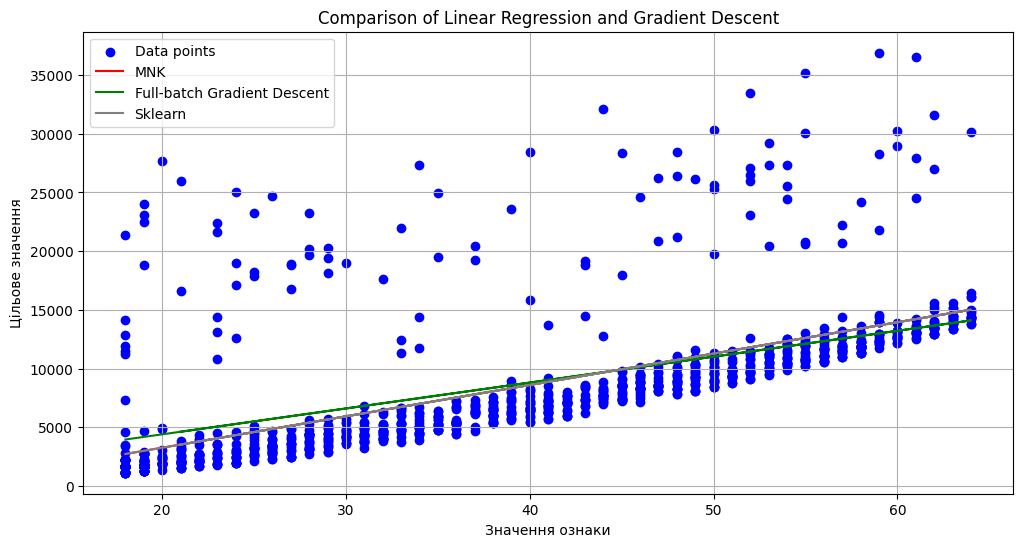

In [77]:
import matplotlib.pyplot as plt
# Візуалізація результатів
plt.figure(figsize=(12, 6))
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X, predictions_MNK, color='red', label='MNK')
plt.plot(X, predictions_fbgd, color='green', label='Full-batch Gradient Descent')
plt.plot(X_sklearn, predictions_sklearn, color='grey', label='Sklearn')
plt.title('Comparison of Linear Regression and Gradient Descent')
plt.xlabel('Значення ознаки')
plt.ylabel('Цільове значення')
plt.legend()
plt.grid(True)
plt.show()


##Висновок

МНК і sklearn дають однаковий результат, тому лінії на графіку накладаються. Вони дають кращий результат, ніж градієнтний спуск, оскільки показують менший RMSE

 **Завдання 2.** Навчіть модель лінійної регресії з допомогою sklearn оцінювати розмір медичних збори для **курців** за їх віком.
Виведіть
- точність моделі
-  коефіцієнти
-  візуалізуйте модель у вигляді лінії на графіку розсіювання `age` проти `charges`

і зробіть висновки, чи це хороша модель, чи ви б її використовували в компанії?

In [78]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [80]:
smoker_df = medical_df[medical_df.smoker == 'yes']
X_smoker = smoker_df["age"].to_frame()
y_smoker = smoker_df["charges"]
lin_reg_smokers = LinearRegression().fit(X_smoker, y_smoker)
predictions_sklearn_smokers = lin_reg.predict(X_smoker)
r2 = r2_score(y_smoker, predictions_sklearn_smokers)
rmse = mean_squared_error(y_smoker, predictions_sklearn_smokers)
mae = mean_absolute_error(y_smoker, predictions_sklearn_smokers)
print("r2, rmse, mae:")
print(r2, rmse, mae)
print("\ncoefficients:")
print(lin_reg_smokers.coef_, lin_reg_smokers.intercept_)


r2, rmse, mae:
-4.151878743727262 683763287.6856331 23848.667800113806

coefficients:
[305.23760211] 20294.128126915966


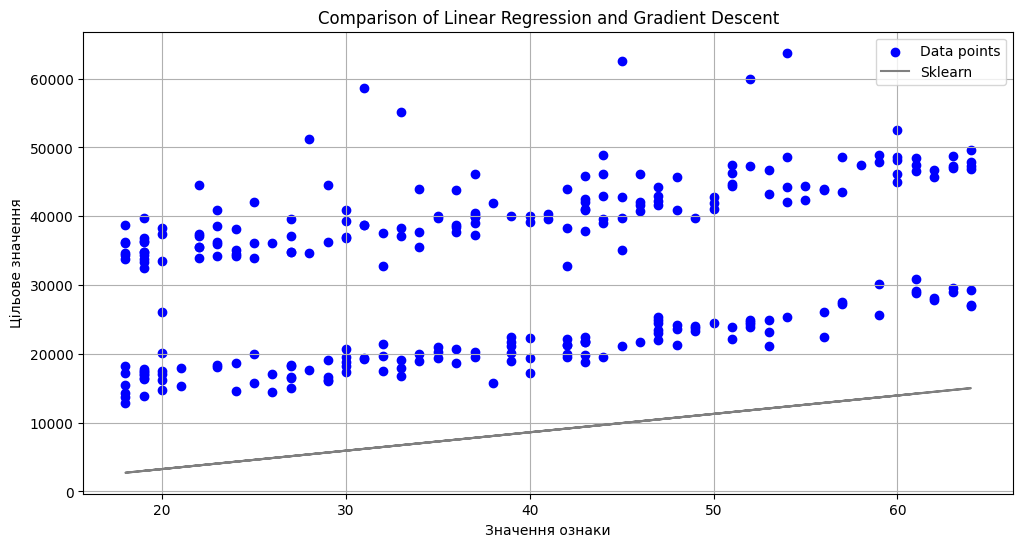

In [81]:
plt.figure(figsize=(12, 6))
plt.scatter(X_smoker, y_smoker, color='blue', label='Data points')
plt.plot(X_smoker, predictions_sklearn_smokers, color='grey', label='Sklearn')
plt.title('Comparison of Linear Regression and Gradient Descent')
plt.xlabel('Значення ознаки')
plt.ylabel('Цільове значення')
plt.legend()
plt.grid(True)
plt.show()


Модель використовувати не можна, так як R2 менше нуля, тобто передбачення гірше, ніж просто по середньому. Також із графіка видно, що лінія знаходиться нижче всіх даних